<a href="https://colab.research.google.com/github/Trungp13/sentiment-analysis-app/blob/main/text-sentiment-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle (5).json
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IMDB Dataset.csv        
Số dòng: 50000
📋 Classification Report:

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



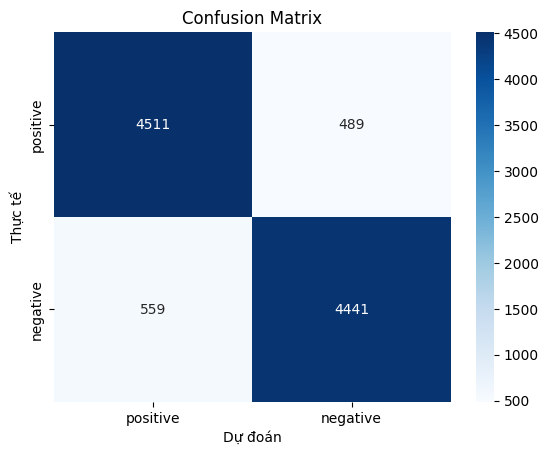

,Review,Sentiment,Probability (positive),Probability (negative)
0,I really loved this movie. It was touching and...,positive,0.995,0.005
1,What a terrible film. I want my 2 hours back.,negative,0.058,0.942
2,"It was okay, not bad but nothing special.",negative,0.002,0.998
3,"Absolutely brilliant, I cried at the end.",positive,0.929,0.071
4,Meh. Not impressed at all.,positive,0.766,0.234


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# 📌 CÀI ĐẶT & TẢI DỮ LIỆU TỪ KAGGLE

# 👉 Upload kaggle.json (tải từ https://www.kaggle.com/account)
from google.colab import files
files.upload()  # chọn file kaggle.json từ máy bạn

# 👉 Setup Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 👉 Tải IMDb dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip

# 📌 BƯỚC 1: Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 📌 BƯỚC 2: Load dữ liệu
df = pd.read_csv("IMDB Dataset.csv")
print("Số dòng:", len(df))
df.head()

# 📌 BƯỚC 3: Tiền xử lý văn bản
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

df["clean_text"] = df["review"].astype(str).apply(clean_text)

# 📌 BƯỚC 4: Vector hóa TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]

# 📌 BƯỚC 5: Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 📌 BƯỚC 6: Huấn luyện Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 📌 BƯỚC 7: Đánh giá mô hình
y_pred = model.predict(X_test)

print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["positive", "negative"],
            yticklabels=["positive", "negative"])
plt.title("Confusion Matrix")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

# 📌 BƯỚC 8: Hàm dự đoán văn bản mới
def predict_sentiment(text):
    text_clean = clean_text(text)
    text_vec = vectorizer.transform([text_clean])
    pred = model.predict(text_vec)[0]
    return pred

# 📌 BƯỚC 9: DỰ ĐOÁN NÂNG CAO

# ✅ Hàm dự đoán với xác suất
def predict_with_prob(text):
    text_clean = clean_text(text)
    text_vec = vectorizer.transform([text_clean])
    proba = model.predict_proba(text_vec)[0]
    label = model.predict(text_vec)[0]
    return label, dict(zip(model.classes_, np.round(proba, 3)))

# ✅ Danh sách câu thử nghiệm
test_reviews = [
    "I really loved this movie. It was touching and beautiful!",
    "What a terrible film. I want my 2 hours back.",
    "It was okay, not bad but nothing special.",
    "Absolutely brilliant, I cried at the end.",
    "Meh. Not impressed at all."
]

# ✅ Dự đoán hàng loạt và tạo bảng kết quả
results = []

for review in test_reviews:
    label, prob = predict_with_prob(review)
    results.append({
        "Review": review,
        "Sentiment": label,
        "Probability (positive)": prob.get("positive"),
        "Probability (negative)": prob.get("negative")
    })

results_df = pd.DataFrame(results)
display(results_df)

# lưu file model và vectorizer
from google.colab import files

files.download("model.pkl")
files.download("vectorizer.pkl")